In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
avisos_detalle = pd.read_csv('../../datos_preprocesados/fiuba_6_avisos_detalle.csv')
# Estas columnas no aportan suficiente información
# idpais: Siempre vale 1
# ciudad: Hay alrededor de 50 registros con esta información, el resto es NaN
# mapacalle: Hay sólo 683 registros con esta información.
avisos_detalle = avisos_detalle.drop(axis=1, labels=['idpais', 'ciudad', 'mapacalle', 'titulo', 'descripcion', 'nivel_laboral', 'denominacion_empresa'])
avisos_detalle['nombre_zona'] = avisos_detalle['nombre_zona'].astype('category')
avisos_detalle = pd.get_dummies(avisos_detalle, columns=['nombre_zona', 'nombre_area', 'tipo_de_trabajo'])
avisos_detalle.head()

,idaviso,nombre_zona_Buenos Aires (fuera de GBA),nombre_zona_Capital Federal,nombre_zona_Catamarca,nombre_zona_Ciudad de Mendoza,nombre_zona_Cordoba,nombre_zona_Corrientes,nombre_zona_GBA Oeste,nombre_zona_Gran Buenos Aires,nombre_zona_La Plata,...,tipo_de_trabajo_Fines de Semana,tipo_de_trabajo_Full-time,tipo_de_trabajo_Part-time,tipo_de_trabajo_Pasantia,tipo_de_trabajo_Por Contrato,tipo_de_trabajo_Por Horas,tipo_de_trabajo_Primer empleo,tipo_de_trabajo_Teletrabajo,tipo_de_trabajo_Temporario,tipo_de_trabajo_Voluntario
0,1001284385,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1110092955,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1110092958,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1110391074,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1110669632,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [3]:
postulantes = pd.read_csv('../../datos_procesados/vector_postulantes.csv') # Este archivo se genera en postulantes.py
postulantes.head()

,idpostulante,sexo,edad,nivel_educativo
0,0z5Dmrd,1,52,4.0
1,0z5JW1r,1,47,3.0
2,0z5VvGv,1,30,2.0
3,0zB01pE,1,28,3.0
4,0zB026d,-1,40,2.5


In [4]:
postulaciones = pd.read_csv('../../tmp/set_entrenamiento.csv') # El set tiene filtrado que avisos se vieron y que avisos se postularon.
postulaciones.info()
postulaciones = pd.merge(postulaciones, postulantes, on='idpostulante', how='inner')
postulaciones = postulaciones.drop(axis=1, labels=['idpostulante'])
postulaciones = postulaciones[postulaciones['sepostulo'] == 1]
postulaciones = postulaciones.drop(axis=1, labels=['sepostulo'])

C:\Users\Franco\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9441177 entries, 0 to 9441176
Data columns (total 3 columns):
idaviso         object
idpostulante    object
sepostulo       int64
dtypes: int64(1), object(2)
memory usage: 216.1+ MB


In [5]:
postulaciones.head()

,idaviso,sexo,edad,nivel_educativo
0,1112414702,1,36,2.0
1,1112408569,1,36,2.0
2,1112407223,1,36,2.0
3,1112399495,1,36,2.0
4,1112394024,1,36,2.0


In [6]:
avisos_postulantes_data = postulaciones.groupby('idaviso').agg('mean')
avisos_postulantes_data.head()

,sexo,edad,nivel_educativo
idaviso,,,
8725750,0.203540,31.707965,2.331858
12543760,-0.148148,29.226226,2.750751
12812680,-0.818841,24.746377,2.112319
17903700,-0.771812,33.221477,2.771812
1000132160,0.666667,37.416667,2.833333


In [7]:
avisos_detalle = avisos_detalle.set_index('idaviso')
avisos_detalle = pd.merge(avisos_detalle, avisos_postulantes_data, left_index=True, right_index=True)
avisos_detalle = avisos_detalle.reset_index('idaviso')
avisos_detalle.head()

,idaviso,nombre_zona_Buenos Aires (fuera de GBA),nombre_zona_Capital Federal,nombre_zona_Catamarca,nombre_zona_Ciudad de Mendoza,nombre_zona_Cordoba,nombre_zona_Corrientes,nombre_zona_GBA Oeste,nombre_zona_Gran Buenos Aires,nombre_zona_La Plata,...,tipo_de_trabajo_Pasantia,tipo_de_trabajo_Por Contrato,tipo_de_trabajo_Por Horas,tipo_de_trabajo_Primer empleo,tipo_de_trabajo_Teletrabajo,tipo_de_trabajo_Temporario,tipo_de_trabajo_Voluntario,sexo,edad,nivel_educativo
0,1001284385,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0.238520,31.433673,2.552934
1,1110092955,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0.507120,29.761076,2.081883
2,1110092958,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0.655844,29.480519,2.066017
3,1110391074,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0.142087,29.682837,2.583333
4,1110669632,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0.971477,32.612416,2.230705


In [8]:
entrenamiento = pd.read_csv('../../tmp/set_entrenamiento.csv')
entrenamiento.head()

C:\Users\Franco\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,idaviso,idpostulante,sepostulo
0,1112414702,8MazRXR,1
1,1112193010,8MZW3vM,1
2,1112282410,0zPYrav,1
3,1112324996,LNeDzPb,1
4,1112412029,bOJx4Eq,1


In [9]:
vistas = pd.read_csv('../../datos_preprocesados/fiuba_3_vistas.csv')
vistas = vistas[['idAviso','idpostulante']]
vistas.head()

,idAviso,idpostulante
0,1111780242,YjVJQ6Z
1,1112263876,BmVpYoR
2,1112327963,wVkBzZd
3,1112318643,OqmP9pv
4,1111903673,DrpbXDP


In [10]:
cant_vistas = vistas.groupby(['idAviso', 'idpostulante']).size().reset_index(name='cant_vistas')
cant_vistas.head()

,idAviso,idpostulante,cant_vistas
0,18,BolNL,2
1,48375,RwVdKR,1
2,169730,1KjXB,2
3,169730,2AKzxa,2
4,169730,6LJ64,1


In [11]:
entrenamiento = pd.merge(entrenamiento, cant_vistas, left_on=['idaviso','idpostulante'], right_on = ['idAviso', 'idpostulante'], how='left')
entrenamiento.head()

,idaviso,idpostulante,sepostulo,idAviso,cant_vistas
0,1112414702,8MazRXR,1,1.112415e+09,1.0
1,1112193010,8MZW3vM,1,NaN,NaN
2,1112282410,0zPYrav,1,NaN,NaN
3,1112324996,LNeDzPb,1,NaN,NaN
4,1112412029,bOJx4Eq,1,NaN,NaN


In [12]:
entrenamiento = entrenamiento.drop(axis=1, labels=['idAviso'])
entrenamiento = entrenamiento.fillna(0, axis=1)
entrenamiento.head()

,idaviso,idpostulante,sepostulo,cant_vistas
0,1112414702,8MazRXR,1,1.0
1,1112193010,8MZW3vM,1,0.0
2,1112282410,0zPYrav,1,0.0
3,1112324996,LNeDzPb,1,0.0
4,1112412029,bOJx4Eq,1,0.0


In [13]:
empresa_area = pd.read_csv('../../datos_preprocesados/fiuba_6_avisos_detalle.csv', usecols=['idaviso','denominacion_empresa','nombre_area'])
empresa_area.head()

,idaviso,nombre_area,denominacion_empresa
0,1001284385,Otros,Establecimiento Las Marías
1,1110092955,Producción,RANDSTAD
2,1110092958,Mantenimiento,RANDSTAD
3,1110391074,Ingeniería Industrial,Coca Cola Andina Argentina
4,1110669632,Mantenimiento,PLUMARI S A


In [14]:
vistas = pd.merge(vistas, empresa_area, left_on='idAviso', right_on='idaviso')
vistas.head()

,idAviso,idpostulante,idaviso,nombre_area,denominacion_empresa
0,1111780242,YjVJQ6Z,1111780242,Programación de producción,dm
1,1111780242,dYjRpMD,1111780242,Programación de producción,dm
2,1111780242,wVopPXl,1111780242,Programación de producción,dm
3,1111780242,wVopPXl,1111780242,Programación de producción,dm
4,1111780242,wVoOPoL,1111780242,Programación de producción,dm


In [15]:
vistas = vistas.drop(labels='idAviso', axis=1)

In [16]:
cant_vistas_empresa = (vistas[['idpostulante', 'denominacion_empresa']]).groupby(['idpostulante', 'denominacion_empresa']).size().reset_index(name='cant_vistas_empresa')
cant_vistas_empresa.head()

,idpostulante,denominacion_empresa,cant_vistas_empresa
0,0005E,Baufest,2
1,00Lkv,Whirlpool,2
2,00dMd,Whirlpool,4
3,01QAq,BEYA,1
4,021OM,Whirlpool,5


In [17]:
empresas = empresa_area[['idaviso','denominacion_empresa']]
entrenamiento = pd.merge(entrenamiento,empresas, on='idaviso')
entrenamiento.head()

,idaviso,idpostulante,sepostulo,cant_vistas,denominacion_empresa
0,1112414702,8MazRXR,1,1.0,Gentile y Asociados Consultores
1,1112414702,1M08Db,1,0.0,Gentile y Asociados Consultores
2,1112414702,3N2AQlr,1,2.0,Gentile y Asociados Consultores
3,1112414702,ekOJWx8,1,0.0,Gentile y Asociados Consultores
4,1112414702,96W1Xzp,1,4.0,Gentile y Asociados Consultores


In [18]:
entrenamiento = pd.merge(entrenamiento, cant_vistas_empresa, on=['idpostulante','denominacion_empresa'], how='left')
entrenamiento = entrenamiento.fillna(0, axis=1)
entrenamiento.head()

,idaviso,idpostulante,sepostulo,cant_vistas,denominacion_empresa,cant_vistas_empresa
0,1112414702,8MazRXR,1,1.0,Gentile y Asociados Consultores,1.0
1,1112414702,1M08Db,1,0.0,Gentile y Asociados Consultores,0.0
2,1112414702,3N2AQlr,1,2.0,Gentile y Asociados Consultores,2.0
3,1112414702,ekOJWx8,1,0.0,Gentile y Asociados Consultores,0.0
4,1112414702,96W1Xzp,1,4.0,Gentile y Asociados Consultores,6.0


In [19]:
cant_vistas_area = (vistas[['idpostulante', 'nombre_area']]).groupby(['idpostulante', 'nombre_area']).size().reset_index(name='cant_vistas_area')
cant_vistas_area.head()

,idpostulante,nombre_area,cant_vistas_area
0,0005E,Tecnologia / Sistemas,2
1,00Lkv,Comercio Exterior,2
2,00dMd,Comercio Exterior,4
3,01QAq,Contabilidad,1
4,021OM,Comercio Exterior,5


In [20]:
areas = empresa_area[['idaviso','nombre_area']]
entrenamiento = pd.merge(entrenamiento, areas, on='idaviso')
entrenamiento.head()

,idaviso,idpostulante,sepostulo,cant_vistas,denominacion_empresa,cant_vistas_empresa,nombre_area
0,1112414702,8MazRXR,1,1.0,Gentile y Asociados Consultores,1.0,Mantenimiento
1,1112414702,1M08Db,1,0.0,Gentile y Asociados Consultores,0.0,Mantenimiento
2,1112414702,3N2AQlr,1,2.0,Gentile y Asociados Consultores,2.0,Mantenimiento
3,1112414702,ekOJWx8,1,0.0,Gentile y Asociados Consultores,0.0,Mantenimiento
4,1112414702,96W1Xzp,1,4.0,Gentile y Asociados Consultores,6.0,Mantenimiento


In [21]:
entrenamiento = pd.merge(entrenamiento, cant_vistas_area, on=['idpostulante','nombre_area'], how='left')
entrenamiento = entrenamiento.fillna(0, axis=1)
entrenamiento.head()

,idaviso,idpostulante,sepostulo,cant_vistas,denominacion_empresa,cant_vistas_empresa,nombre_area,cant_vistas_area
0,1112414702,8MazRXR,1,1.0,Gentile y Asociados Consultores,1.0,Mantenimiento,3.0
1,1112414702,1M08Db,1,0.0,Gentile y Asociados Consultores,0.0,Mantenimiento,4.0
2,1112414702,3N2AQlr,1,2.0,Gentile y Asociados Consultores,2.0,Mantenimiento,4.0
3,1112414702,ekOJWx8,1,0.0,Gentile y Asociados Consultores,0.0,Mantenimiento,5.0
4,1112414702,96W1Xzp,1,4.0,Gentile y Asociados Consultores,6.0,Mantenimiento,110.0


In [22]:
postulaciones = pd.read_csv('../../tmp/set_entrenamiento.csv') # El set tiene filtrado que avisos se vieron y que avisos se postularon.
postulaciones = postulaciones[postulaciones['sepostulo'] == 1]
postulaciones = postulaciones.drop(labels='sepostulo', axis = 1)
postulaciones.head()

C:\Users\Franco\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,idaviso,idpostulante
0,1112414702,8MazRXR
1,1112193010,8MZW3vM
2,1112282410,0zPYrav
3,1112324996,LNeDzPb
4,1112412029,bOJx4Eq


In [23]:
postulaciones = pd.merge(postulaciones, empresa_area, on='idaviso')
postulaciones.head()

,idaviso,idpostulante,nombre_area,denominacion_empresa
0,1112414702,8MazRXR,Mantenimiento,Gentile y Asociados Consultores
1,1112414702,1M08Db,Mantenimiento,Gentile y Asociados Consultores
2,1112414702,3N2AQlr,Mantenimiento,Gentile y Asociados Consultores
3,1112414702,ekOJWx8,Mantenimiento,Gentile y Asociados Consultores
4,1112414702,96W1Xzp,Mantenimiento,Gentile y Asociados Consultores


In [24]:
cant_postulaciones_empresa = (postulaciones[['idpostulante', 'denominacion_empresa']]).groupby(['idpostulante', 'denominacion_empresa']).size().reset_index(name='cant_postulaciones_empresa')
cant_postulaciones_empresa.head()

,idpostulante,denominacion_empresa,cant_postulaciones_empresa
0,0z5Dmrd,Importante Empresa,1
1,0z5Dmrd,PilarArtigas,1
2,0z5JW1r,Adecco -Región GBA SUR,1
3,0z5JW1r,CK Recursos Humanos,1
4,0z5JW1r,Complement Group (holding),1


In [25]:
entrenamiento = pd.merge(entrenamiento, cant_postulaciones_empresa, on=['idpostulante','denominacion_empresa'], how='left')
entrenamiento = entrenamiento.fillna(0, axis=1)
entrenamiento = entrenamiento.drop(labels='denominacion_empresa',axis=1)
entrenamiento.head()

,idaviso,idpostulante,sepostulo,cant_vistas,cant_vistas_empresa,nombre_area,cant_vistas_area,cant_postulaciones_empresa
0,1112414702,8MazRXR,1,1.0,1.0,Mantenimiento,3.0,2.0
1,1112414702,1M08Db,1,0.0,0.0,Mantenimiento,4.0,2.0
2,1112414702,3N2AQlr,1,2.0,2.0,Mantenimiento,4.0,1.0
3,1112414702,ekOJWx8,1,0.0,0.0,Mantenimiento,5.0,1.0
4,1112414702,96W1Xzp,1,4.0,6.0,Mantenimiento,110.0,1.0


In [26]:
cant_postulaciones_area = (postulaciones[['idpostulante', 'nombre_area']]).groupby(['idpostulante', 'nombre_area']).size().reset_index(name='cant_postulaciones_area')
cant_postulaciones_area.head()

,idpostulante,nombre_area,cant_postulaciones_area
0,0z5Dmrd,Recursos Humanos,2
1,0z5JW1r,Almacén / Depósito / Expedición,1
2,0z5JW1r,Comercial,1
3,0z5JW1r,Desarrollo de Negocios,1
4,0z5JW1r,Gastronomia,1


In [27]:
entrenamiento = pd.merge(entrenamiento, cant_postulaciones_area, on=['idpostulante','nombre_area'], how='left')
entrenamiento = entrenamiento.fillna(0, axis=1)
entrenamiento = entrenamiento.drop(labels='nombre_area',axis=1)
entrenamiento.head()

,idaviso,idpostulante,sepostulo,cant_vistas,cant_vistas_empresa,cant_vistas_area,cant_postulaciones_empresa,cant_postulaciones_area
0,1112414702,8MazRXR,1,1.0,1.0,3.0,2.0,9.0
1,1112414702,1M08Db,1,0.0,0.0,4.0,2.0,15.0
2,1112414702,3N2AQlr,1,2.0,2.0,4.0,1.0,3.0
3,1112414702,ekOJWx8,1,0.0,0.0,5.0,1.0,4.0
4,1112414702,96W1Xzp,1,4.0,6.0,110.0,1.0,55.0


In [28]:
entrenamiento['cant_vistas'] = entrenamiento['cant_vistas'].astype('int64')
entrenamiento['cant_vistas_empresa'] = entrenamiento['cant_vistas_empresa'].astype('int64')
entrenamiento['cant_vistas_area'] = entrenamiento['cant_vistas_area'].astype('int64')
entrenamiento['cant_postulaciones_empresa'] = entrenamiento['cant_postulaciones_empresa'].astype('int64')
entrenamiento['cant_postulaciones_area'] = entrenamiento['cant_postulaciones_area'].astype('int64')
entrenamiento.head()

,idaviso,idpostulante,sepostulo,cant_vistas,cant_vistas_empresa,cant_vistas_area,cant_postulaciones_empresa,cant_postulaciones_area
0,1112414702,8MazRXR,1,1,1,3,2,9
1,1112414702,1M08Db,1,0,0,4,2,15
2,1112414702,3N2AQlr,1,2,2,4,1,3
3,1112414702,ekOJWx8,1,0,0,5,1,4
4,1112414702,96W1Xzp,1,4,6,110,1,55


In [29]:
entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9179033 entries, 0 to 9179032
Data columns (total 8 columns):
idaviso                       int64
idpostulante                  object
sepostulo                     int64
cant_vistas                   int64
cant_vistas_empresa           int64
cant_vistas_area              int64
cant_postulaciones_empresa    int64
cant_postulaciones_area       int64
dtypes: int64(7), object(1)
memory usage: 630.3+ MB


In [30]:
avisos_detalle.head()

,idaviso,nombre_zona_Buenos Aires (fuera de GBA),nombre_zona_Capital Federal,nombre_zona_Catamarca,nombre_zona_Ciudad de Mendoza,nombre_zona_Cordoba,nombre_zona_Corrientes,nombre_zona_GBA Oeste,nombre_zona_Gran Buenos Aires,nombre_zona_La Plata,...,tipo_de_trabajo_Pasantia,tipo_de_trabajo_Por Contrato,tipo_de_trabajo_Por Horas,tipo_de_trabajo_Primer empleo,tipo_de_trabajo_Teletrabajo,tipo_de_trabajo_Temporario,tipo_de_trabajo_Voluntario,sexo,edad,nivel_educativo
0,1001284385,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0.238520,31.433673,2.552934
1,1110092955,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0.507120,29.761076,2.081883
2,1110092958,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0.655844,29.480519,2.066017
3,1110391074,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0.142087,29.682837,2.583333
4,1110669632,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0.971477,32.612416,2.230705


In [45]:
avisos_detalle = avisos_detalle.rename({'sexo':'prom_sexo', 'edad':'prom_edad', 'nivel_educativo':'prom_nivel_educativo'})

In [31]:
postulantes.head()

,idpostulante,sexo,edad,nivel_educativo
0,0z5Dmrd,1,52,4.0
1,0z5JW1r,1,47,3.0
2,0z5VvGv,1,30,2.0
3,0zB01pE,1,28,3.0
4,0zB026d,-1,40,2.5


In [32]:
avisos_detalle.to_csv('../../datos_procesados/avisos.csv', index=False)

In [33]:
entrenamiento.to_csv('../../datos_procesados/entrenamiento.csv', index=False)

#### Hasta acá: Generación de datos


#### Desde acá: Uso de resultados cacheados porque soy pobre y no tengo tanta RAM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
avisos_detalle = pd.read_csv('../../datos_procesados/avisos.csv')
entrenamiento = pd.read_csv('../../datos_procesados/entrenamiento.csv')
postulantes = pd.read_csv('../../datos_procesados/vector_postulantes.csv')

In [3]:
entrenamiento.head()

,idaviso,idpostulante,sepostulo,cant_vistas,cant_vistas_empresa,cant_vistas_area,cant_postulaciones_empresa,cant_postulaciones_area
0,1112414702,8MazRXR,1,1,1,3,2,9
1,1112414702,1M08Db,1,0,0,4,2,15
2,1112414702,3N2AQlr,1,2,2,4,1,3
3,1112414702,ekOJWx8,1,0,0,5,1,4
4,1112414702,96W1Xzp,1,4,6,110,1,55


In [4]:
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier(criterion='entropy', n_jobs=-1, verbose=1)

In [5]:
sample = entrenamiento.sample(n= 500000)
training = sample [:400000]
test = sample [400000:]

training = pd.merge(training, postulantes, on='idpostulante', how='inner')
training= pd.merge(training, avisos_detalle, on='idaviso', how='inner')
training = training.drop(axis=1, labels=['idaviso', 'idpostulante'])
training.head()

,sepostulo,cant_vistas,cant_vistas_empresa,cant_vistas_area,cant_postulaciones_empresa,cant_postulaciones_area,sexo_x,edad_x,nivel_educativo_x,nombre_zona_Buenos Aires (fuera de GBA),...,tipo_de_trabajo_Pasantia,tipo_de_trabajo_Por Contrato,tipo_de_trabajo_Por Horas,tipo_de_trabajo_Primer empleo,tipo_de_trabajo_Teletrabajo,tipo_de_trabajo_Temporario,tipo_de_trabajo_Voluntario,sexo_y,edad_y,nivel_educativo_y
0,1,3,3,9,1,3,1,43,2.0,0,...,0,0,0,0,0,0,0,0.864198,29.320988,2.030864
1,1,0,0,44,1,14,1,29,2.0,0,...,0,0,0,0,0,0,0,0.864198,29.320988,2.030864
2,1,0,2,8,1,2,1,19,2.0,0,...,0,0,0,0,0,0,0,0.864198,29.320988,2.030864
3,0,1,1,7,0,1,1,41,2.0,0,...,0,0,0,0,0,0,0,0.864198,29.320988,2.030864
4,0,3,3,6,0,1,1,29,2.0,0,...,0,0,0,0,0,0,0,0.864198,29.320988,2.030864


In [6]:
training[training['sexo_y'].isna()] = 0
training[training['edad_y'].isna()] = 30
y = training['sepostulo']
training = training.drop(axis=1, labels=['sepostulo'])
rdf.fit(training, y)

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.4s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

In [7]:
test = pd.merge(test, postulantes, on='idpostulante', how='inner')
test = pd.merge(test, avisos_detalle, on='idaviso', how='inner')
test = test.drop(axis=1, labels=['idaviso', 'idpostulante'])
test[test['sexo_y'].isna()] = 0
test[test['edad_y'].isna()] = 30
y = test['sepostulo']
test = test.drop(axis=1, labels=['sepostulo'])
rdf.score(test, y)

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.6s finished


0.9606643840928986

In [8]:
test_o = pd.read_csv('../../datos_procesados/to_kaggle.csv')
test_o.head()

,id,idaviso,idpostulante,cant_vistas,cant_vistas_empresa,cant_vistas_area,cant_postulaciones_empresa,cant_postulaciones_area
0,0,739260,6M9ZQR,0,0,4,0,0
1,1,739260,6v1xdL,0,0,0,0,5
2,2,739260,ezRKm9,0,0,1,0,0
3,3,758580,1Q35ej,0,0,0,0,0
4,4,758580,EAN4J6,0,0,0,0,0


In [7]:
(test_o['cant_postulaciones_empresa'] != 0).count()

100000

In [9]:
test = pd.merge(test_o, postulantes, on='idpostulante', how='left')
test = pd.merge(test, avisos_detalle, on='idaviso', how='left')
test = test.drop(axis=1, labels=['id', 'idaviso', 'idpostulante'])
test[test['sexo_y'].isna()] = 0
test[test['edad_y'].isna()] = 30
test[test['sexo_x'].isna()] = 0
test[test['edad_x'].isna()] = 30
test[test['nivel_educativo_x'].isna()] = 0
ret = rdf.predict_proba(test)

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


In [10]:
test_o['sepostulo'] = pd.DataFrame(ret)[1]

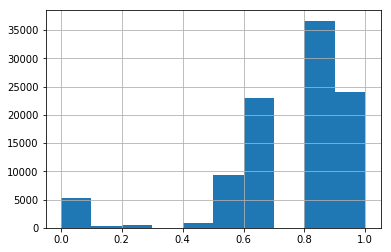

In [11]:
test_o['sepostulo'].hist()

In [12]:
test_o = test_o.drop(axis=1, labels=['idaviso', 'idpostulante'])

In [13]:
test_o.to_csv('../../submit-2.csv', index=False)